In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
# Create Database
conn=sqlite3.connect("sales_data.db")
cursor=conn.cursor()

# Create table & Insert Data
cursor.execute(''' create table if not exists sales(id integer primary key, product text, quantity integer, price real)''')
sample_data=[('Apple',10,0.5),('Banana',20,0.2),('Apple',15,0.5),('Orange',30,0.3),('Banana',10,0.2),('Orange',20,0.3)]
cursor.executemany('INSERT INTO sales(product,quantity,price)VALUES(?,?,?)',sample_data)
conn.commit()

In [29]:
query=''' select product,sum(quantity)as total_qty,
sum(quantity * price)as revenue from sales group by product ''' 
df=pd.read_sql_query(query,conn)
print(df)

  product  total_qty  revenue
0   Apple         25     12.5
1  Banana         30      6.0
2  Orange         50     15.0


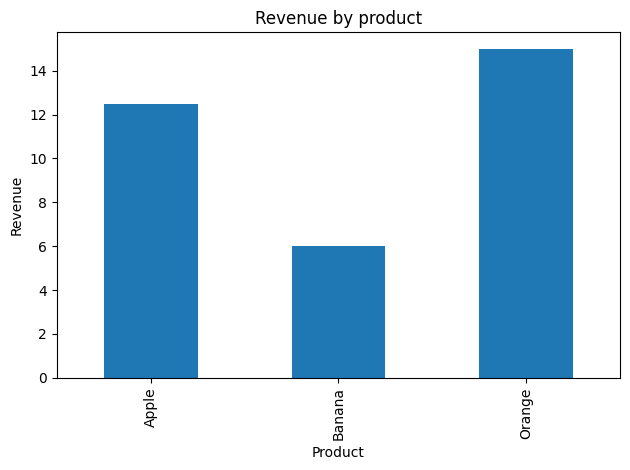

In [28]:
df.plot(kind='bar',x='product',y='revenue',legend=False)
plt.title('Revenue by product') 
plt.xlabel('Product')
plt.ylabel('Revenue') 
plt.tight_layout() 
plt.show()